In [198]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
data=pd.read_csv('test_data.csv')

In [202]:
data

,alpha,beta,gamma,delta,category
0,0.123030,0.961770,0.896823,0.249546,A
1,0.935262,0.595710,0.536027,0.383397,E
2,0.564859,0.793235,0.307600,0.997222,A
3,0.273371,0.348825,0.452246,0.499595,A
4,0.446372,0.454495,0.555900,0.264152,A
...,...,...,...,...,...
95,0.623661,0.996377,0.880850,0.624013,B
96,0.340979,0.164018,0.738116,0.247733,C
97,0.707766,0.882754,0.121580,0.365758,B
98,0.158622,0.244060,0.032672,0.801727,B


In [204]:
data.head()

,alpha,beta,gamma,delta,category
0,0.123030,0.961770,0.896823,0.249546,A
1,0.935262,0.595710,0.536027,0.383397,E
2,0.564859,0.793235,0.307600,0.997222,A
3,0.273371,0.348825,0.452246,0.499595,A
4,0.446372,0.454495,0.555900,0.264152,A


In [206]:
data.tail()

,alpha,beta,gamma,delta,category
95,0.623661,0.996377,0.880850,0.624013,B
96,0.340979,0.164018,0.738116,0.247733,C
97,0.707766,0.882754,0.121580,0.365758,B
98,0.158622,0.244060,0.032672,0.801727,B
99,0.967617,0.518446,0.693016,0.239999,E


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     100 non-null    float64
 1   beta      100 non-null    float64
 2   gamma     100 non-null    float64
 3   delta     100 non-null    float64
 4   category  100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [210]:
data.describe()

,alpha,beta,gamma,delta
count,100.000000,100.000000,100.000000,100.000000
mean,0.516986,0.545924,0.480302,0.484264
std,0.270822,0.299426,0.306718,0.299767
min,0.005895,0.003800,0.016851,0.006033
25%,0.285416,0.287310,0.192912,0.214979
50%,0.519469,0.588546,0.484919,0.461263
75%,0.710664,0.791194,0.734047,0.766322
max,0.992288,0.996377,0.992480,0.997222


In [212]:
x=data[['alpha', 'beta', 'gamma', 'delta']]
y=data['category']

In [214]:
x

,alpha,beta,gamma,delta
0,0.123030,0.961770,0.896823,0.249546
1,0.935262,0.595710,0.536027,0.383397
2,0.564859,0.793235,0.307600,0.997222
3,0.273371,0.348825,0.452246,0.499595
4,0.446372,0.454495,0.555900,0.264152
...,...,...,...,...
95,0.623661,0.996377,0.880850,0.624013
96,0.340979,0.164018,0.738116,0.247733
97,0.707766,0.882754,0.121580,0.365758
98,0.158622,0.244060,0.032672,0.801727


In [216]:
y

0     A
1     E
2     A
3     A
4     A
     ..
95    B
96    C
97    B
98    B
99    E
Name: category, Length: 100, dtype: object

In [218]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

In [220]:
x_train

,alpha,beta,gamma,delta
4,0.446372,0.454495,0.555900,0.264152
53,0.370204,0.155104,0.627508,0.615069
5,0.227528,0.566503,0.352945,0.234348
81,0.947204,0.475812,0.944228,0.945764
98,0.158622,0.244060,0.032672,0.801727
...,...,...,...,...
31,0.477622,0.837636,0.226851,0.027888
54,0.617624,0.645114,0.823546,0.127680
73,0.556615,0.952560,0.382028,0.177641
40,0.530951,0.012561,0.390673,0.818214


In [222]:
x_test

,alpha,beta,gamma,delta
26,0.653565,0.779937,0.182331,0.559449
80,0.298122,0.308250,0.255606,0.190388
82,0.456106,0.562419,0.424734,0.650067
68,0.507911,0.571702,0.475622,0.185246
77,0.917502,0.930302,0.196439,0.907854
37,0.507988,0.935482,0.263562,0.091994
3,0.273371,0.348825,0.452246,0.499595
55,0.602897,0.943418,0.067951,0.262619
20,0.559899,0.657870,0.074768,0.484706
17,0.586936,0.134003,0.108908,0.822653


In [224]:
y_train

4     A
53    E
5     A
81    C
98    B
     ..
31    B
54    E
73    D
40    D
83    E
Name: category, Length: 75, dtype: object

In [226]:
y_test

26    E
80    D
82    D
68    C
77    A
37    A
3     A
55    C
20    C
17    C
72    C
24    A
71    C
87    B
89    B
29    C
9     B
67    E
42    E
94    B
85    A
28    B
8     E
11    B
63    C
Name: category, dtype: object

In [228]:
# Applying K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [230]:
# Making predictions on the test set
y_pred = knn.predict(x_test)

In [232]:
y_pred

array(['B', 'A', 'C', 'A', 'A', 'B', 'E', 'B', 'A', 'D', 'C', 'E', 'E',
       'E', 'E', 'B', 'A', 'A', 'A', 'A', 'E', 'A', 'A', 'B', 'C'],
      dtype=object)

In [234]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [236]:
accuracy

0.16

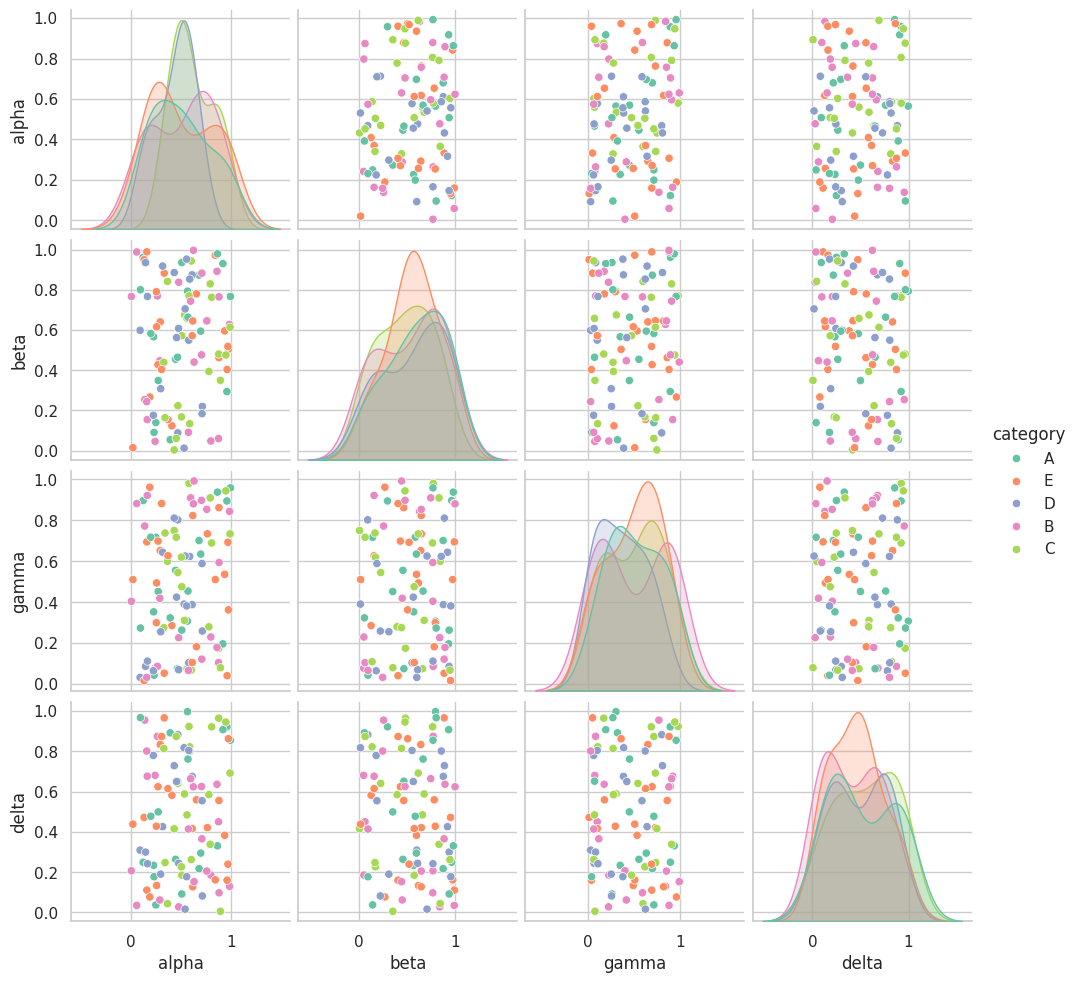

In [242]:
# Visualizing the dataset with a pair plot
# Pairplot to visualize the dataset
sns.set(style="whitegrid")
sns.pairplot(data, hue='category', palette="Set2")
plt.show()

In [ ]:
# Creating scatter plots for different pairs of features
plt.figure(figsize=(15, 10))

# Scatter plot for alpha v beta
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x=data['alpha'], y=data['beta'], hue=data['category'], palette='Set2')
plt.title('alpha v beta')

# Scatter plot for gamma v delta
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x=data['gamma'], y=data['delta'], hue=data['category'], palette='Set2')
plt.title('gamma v delta')

# Scatter plot for alpha v gamma
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x=data['alpha'], y=data['gamma'], hue=data['category'], palette='Set2')
plt.title('alpha v gamma')

# Scatter plot for beta v delta
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x=data['beta'], y=data['delta'], hue=data['category'], palette='Set2')
plt.title('beta v delta')

plt.tight_layout()
plt.show()